In [97]:
from importlib.metadata import version
import torch
torch.manual_seed(123)
print("TORCH VERSION :", version("torch"))
device = "cuda" if torch.cuda.is_available() else 'mps' if torch.backend.mps.is_available() else 'cpu'
print('GPU  : ', device)

TORCH VERSION : 2.2.1
GPU  :  cuda


In [2]:
# Layer Normalization

In [3]:
import torch.nn as nn


In [23]:
batch, seq_len, embedding_dim = 1,5,10
x = torch.rand(1,5,10)

ln = nn.LayerNorm(embedding_dim)
ln(x)

tensor([[[-0.0644, -0.7402,  0.0031,  0.2967, -0.6735, -0.5853, -0.8773,
          -0.3813,  2.7524,  0.2698],
         [-0.1316,  0.0186,  1.4205, -0.9907, -0.8993, -0.4727, -0.7236,
           1.0435,  1.7938, -1.0585],
         [-0.9047, -0.9784,  0.3192,  1.6244, -0.8592, -0.6415,  0.2173,
          -0.7788,  1.9165,  0.0851],
         [-0.6588,  0.1011,  0.8458, -0.7977, -1.4561, -0.0457, -0.0174,
          -0.0126, -0.3930,  2.4344],
         [-0.7179, -0.2993,  1.3945, -1.3772,  0.8009, -0.5917,  1.7312,
          -1.2278,  0.0548,  0.2326]]], grad_fn=<NativeLayerNormBackward0>)

In [30]:
class LayerNormalization(nn.Module):
    
    def __init__(self, eps: float = 10**-6) -> None:
        super().__init__()
        self.eps = eps
        self.alpha = nn.Parameter(torch.ones(1)) # multiplicative parameter
        self.bias = nn.Parameter(torch.zeros(1)) # additive parameter
    
    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        std = x.std(dim=-1, keepdim=True)
        return self.alpha * (x - mean) / (std + self.eps) + self.bias

In [48]:
x= torch.rand(1,10,12)
x = torch.exp(x)
LayerNormalization()(x).shape

torch.Size([1, 10, 12])

In [49]:
import seaborn as sns

In [50]:
x.squeeze(dim=0).shape

torch.Size([10, 12])

<Axes: ylabel='Density'>

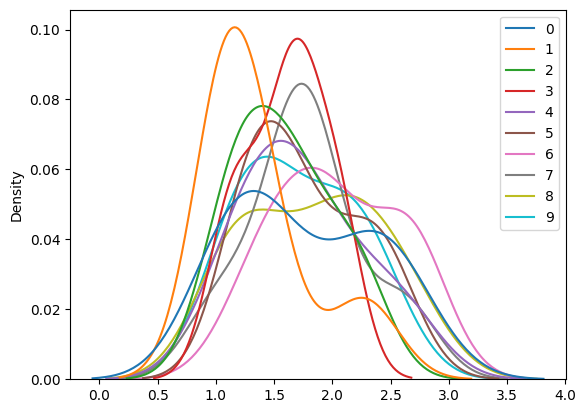

In [51]:
sns.kdeplot(x.squeeze(dim=0).T.numpy())

<Axes: ylabel='Density'>

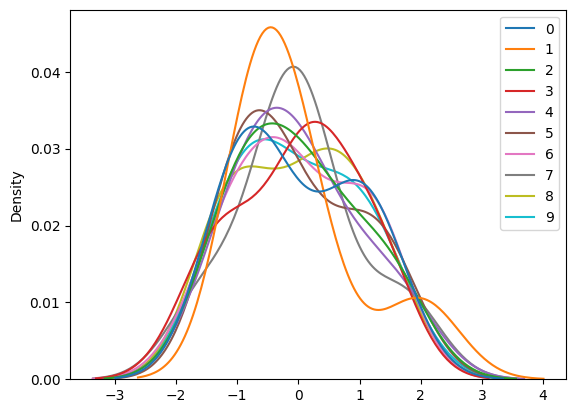

In [52]:
sns.kdeplot(LayerNormalization()(x).squeeze(dim=0).T.detach().numpy())

In [53]:
# In a normal distribution, a standard deviation of 1 means that approximately 68% of data points fall within one standard deviation of the mean (average), while about 95% lie within two standard deviations, and roughly 99.7% are within three standard deviations.

Layer normalization (LayerNorm) has been successfully applied to various deep neural networks to help stabilize training and boost model convergence because of its capability in handling re-centering and re-scaling of both inputs and weight matrix. However, the computational overhead introduced by LayerNorm makes these improvements expensive and significantly slows the underlying network,

re-centering invariance in LayerNorm is dispensable .RMSNorm regularizes the summed inputs to a neuron in one layer according to root mean square (RMS), giving the model re-scaling invariance property and implicit learning rate adaptation ability. RMSNorm is computationally simpler and thus more efficient than LayerNorm

In [7]:
# RMS Layer Normalization

In [89]:
nn.Parameter(torch.ones(1))*torch.rand(5,2)

tensor([[0.0745, 0.2685],
        [0.3059, 0.7875],
        [0.4745, 0.9682],
        [0.5997, 0.5014],
        [0.8170, 0.4343]], grad_fn=<MulBackward0>)

In [109]:
class RMSLayerNormalization(nn.Module):
    def __init__(self,eps:float=1e-6):
        super().__init__()
        self.eps = eps
        self.w = nn.Parameter(torch.ones(1))

    def forward(self,x):
        rvariance = torch.rsqrt((x.pow(2)).mean(dim=-1,keepdim=True) + self.eps) # 1/variance
        norm = (x * rvariance).type_as(x)
        return self.w * norm

In [110]:
x= torch.rand(1,10,12)

RMSLayerNormalization()(x).shape

torch.Size([1, 10, 12])